# Libraries

In [180]:
import pandas as pd
import numpy as np
import optuna
import plotly
from optuna.visualization import plot_contour, plot_edf, plot_intermediate_values, plot_optimization_history, plot_parallel_coordinate
from optuna.visualization import plot_param_importances, plot_rank, plot_slice, plot_timeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns', None)

In [24]:
fixture = pd.read_csv('fixture.csv')
fixture

year  round        date      time region  \
0     2017      1  2017-03-26  14:50:00     SA   
1     2017      1  2017-03-23  19:20:00    VIC   
2     2017      1  2017-03-24  19:50:00    VIC   
3     2017      1  2017-03-25  19:25:00    VIC   
4     2017      1  2017-03-26  16:40:00     WA   
5     2017      1  2017-03-25  19:05:00    QLD   
6     2017      1  2017-03-26  13:10:00    VIC   
7     2017      1  2017-03-25  16:35:00    VIC   
8     2017      1  2017-03-25  16:35:00    NSW   
9     2017      2  2017-04-01  18:25:00    QLD   
10    2017      2  2017-04-02  13:10:00    VIC   
11    2017      2  2017-04-01  16:35:00    NSW   
12    2017      2  2017-04-01  13:45:00    VIC   
13    2017      2  2017-04-02  15:20:00    VIC   
14    2017      2  2017-04-02  16:10:00     SA   
15    2017      2  2017-03-30  19:20:00    VIC   
16    2017      2  2017-04-01  16:40:00     WA   
17    2017      2  2017-03-31  19:50:00    VIC   
18    2017      3  2017-04-09  15:20:00    VIC   
19    2017      3  2017-04-08  17:40:00     WA   
20    2017      3  2017-04-08  16:35:00    VIC   
21    2017      3  2017-04-09  16:40:00    QLD   
22    2017      3  2017-04-08  13:45:00    TAS   
23    2017      3  2017-04-08  19:10:00     SA   
24    2017      3  2017-04-08  14:10:00    VIC   
25    2017      3  2017-04-09  13:10:00    VIC   
26    2017      3  2017-04-07  19:50:00    NSW   
27    2017      4  2017-04-15  19:10:00     SA   
28    2017      4  2017-04-16  16:40:00    QLD   
29    2017      4  2017-04-15  19:25:00    VIC   
30    2017      4  2017-04-16  15:20:00    VIC   
31    2017      4  2017-04-15  16:35:00    ACT   
32    2017      4  2017-04-17  15:20:00    VIC   
33    2017      4  2017-04-15  13:45:00    VIC   
34    2017      4  2017-04-14  16:20:00    VIC   
35    2017      4  2017-04-13  18:10:00     WA   
36    2017      5  2017-04-25  15:20:00    VIC   
37    2017      5  2017-04-22  17:40:00     WA   
38    2017      5  2017-04-22  16:35:00    QLD   
39    2017      5  2017-04-23  16:40:00    VIC   
40    2017      5  2017-04-21  19:20:00     SA   
41    2017      5  2017-04-24  19:25:00    VIC   
42    2017      5  2017-04-23  15:20:00    VIC   
43    2017      5  2017-04-22  19:25:00    NSW   
44    2017      5  2017-04-22  13:45:00    VIC   
45    2017      6  2017-04-30  16:10:00     SA   
46    2017      6  2017-04-29  16:35:00    QLD   
47    2017      6  2017-04-29  14:10:00    VIC   
48    2017      6  2017-04-30  13:10:00    VIC   
49    2017      6  2017-04-30  15:20:00    VIC   
50    2017      6  2017-04-28  19:50:00    ACT   
51    2017      6  2017-04-29  13:45:00    TAS   
52    2017      6  2017-04-29  19:25:00    VIC   
53    2017      6  2017-04-29  18:10:00     WA   
54    2017      7  2017-05-06  14:10:00    VIC   
55    2017      7  2017-05-07  14:40:00     WA   
56    2017      7  2017-05-06  19:25:00    QLD   
57    2017      7  2017-05-07  15:20:00    VIC   
58    2017      7  2017-05-06  13:45:00    TAS   
59    2017      7  2017-05-06  16:05:00     SA   
60    2017      7  2017-05-05  19:50:00    VIC   
61    2017      7  2017-05-07  13:10:00    NSW   
62    2017      7  2017-05-06  19:25:00    VIC   
63    2017      8  2017-05-13  19:10:00     SA   
64    2017      8  2017-05-13  19:25:00    VIC   
65    2017      8  2017-05-14  13:15:00    CHN   
66    2017      8  2017-05-13  16:35:00    NSW   
67    2017      8  2017-05-13  13:45:00    TAS   
68    2017      8  2017-05-14  16:40:00    VIC   
69    2017      8  2017-05-14  13:10:00    VIC   
70    2017      8  2017-05-13  14:10:00    VIC   
71    2017      8  2017-05-12  18:10:00     WA   
72    2017      9  2017-05-20  19:25:00    QLD   
73    2017      9  2017-05-20  19:25:00    VIC   
74    2017      9  2017-05-21  13:10:00    VIC   
75    2017      9  2017-05-21  14:40:00     WA   
76    2017      9  2017-05-19  19:50:00    VIC   
77    2017      9  2017-05-20  16:35:00    NSW   
78    2017      9  2017-05-21  15:20:00    VIC   
79    

# Data Prep

In [143]:
# convert to datetime dtype and extract month and day
fixture['date'] = pd.to_datetime(fixture['date'])
fixture['month'] = fixture['date'].dt.month
fixture['day'] = fixture['date'].dt.day_name()

# convert day into group so that monday, tues, wed, and thurs are all counted as a weekday game.
fixture['day_group'] = fixture['day'].apply(lambda x:'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday'] else x)

# Removing colons and converting time to integer
fixture['time_int'] = fixture['time'].str.replace(':', '').astype(int) / 100
fixture['time_int'] = fixture['time_int'].astype(int)

# create a time group column to show the time floor div
fixture['time_group'] = (fixture['time_int'] - 1200) // 100

# convert dataframe to one-hot vector
fixture_oh = pd.get_dummies(fixture, columns=['region', 'hteam', 'ateam', 'day_group'], dtype='int')

# ordinal encode the year
encoder = OrdinalEncoder()
fixture_oh['year_encoded'] = encoder.fit_transform(fixture_oh[['year']])

fixture_oh.head()

year  round       date      time          venue  hscore  ascore  home_win  \
0  2017      1 2017-03-26  14:50:00  Adelaide Oval     147      91         1   
1  2017      1 2017-03-23  19:20:00         M.C.G.      89     132         0   
2  2017      1 2017-03-24  19:50:00         M.C.G.      86     100         0   
3  2017      1 2017-03-25  19:25:00         M.C.G.     116      91         1   
4  2017      1 2017-03-26  16:40:00        Subiaco      73     115         0   

   hdiff  month       day  time_int  time_group  region_ACT  region_CHN  \
0     56      3    Sunday      1450           2           0           0   
1    -43      3  Thursday      1920           7           0           0   
2    -14      3    Friday      1950           7           0           0   
3     25      3  Saturday      1925           7           0           0   
4    -42      3    Sunday      1640           4           0           0   

   region_NSW  region_NT  region_QLD  region_SA  region_TAS  region_VIC  \
0           0          0           0          1           0           0   
1           0          0           0          0           0           1   
2           0          0           0          0           0           1   
3           0          0           0          0           0           1   
4           0          0           0          0           0           0   

   region_WA  hteam_Adelaide  hteam_Brisbane Lions  hteam_Carlton  \
0          0               1                     0              0   
1          0               0                     0              1   
2          0               0                     0              0   
3          0               0                     0              0   
4          1               0                     0              0   

   hteam_Collingwood  hteam_Essendon  hteam_Fremantle  hteam_Geelong  \
0                  0               0                0              0   
1                  0               0                0              0   
2                  1               0                0              0   
3                  0               1                0              0   
4                  0               0                1              0   

   hteam_Gold Coast  hteam_Greater Western Sydney  hteam_Hawthorn  \
0                 0                             0               0   
1                 0                             0               0   
2                 0                             0               0   
3                 0                             0               0   
4                 0                             0               0   

   hteam_Melbourne  hteam_North Melbourne  hteam_Port Adelaide  \
0                0                      0                    0   
1                0                      0                    0   
2                0                      0                    0   
3                0                      0                    0   
4                0                      0                    0   

   hteam_Richmond  hteam_St Kilda  hteam_Sydney  hteam_West Coast  \
0               0               0             0                 0   
1               0               0             0                 0   
2               0               0             0                 0   
3               0               0             0                 0   
4               0               0             0                 0   

   hteam_Western Bulldogs  ateam_Adelaide  ateam_Brisbane Lions  \
0                       0               0                     0   
1                       0               0                     0   
2                       0               0                     0   
3                       0               0                     0   
4                       0               0                     0   

   ateam_Carlton  ateam_Collingwood  ateam_Essendon  ateam_Fremantle  \
0              0                  0               0                0  

In [140]:
fixture['day_group'].unique()

array(['Sunday', 'Weekday', 'Friday', 'Saturday'], dtype=object)

# Regression Modelling

In [169]:
# Define your features and target variable
X = fixture_oh.drop(['home_win', 'ascore', 'hscore', 'hdiff', 'date', 'time', 'venue', 'time_int', 'year', 'day'], axis=1)
y = fixture_oh['hdiff']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42)

In [170]:
X_train.head()

round  month  time_group  region_ACT  region_CHN  region_NSW  region_NT  \
869      10      5           5           0           0           0          0   
281       9      5           1           0           0           0          0   
285       9      5           7           0           0           0          0   
1347     18      7           1           0           0           0          0   
1278     10      5           7           0           0           0          0   

      region_QLD  region_SA  region_TAS  region_VIC  region_WA  \
869            0          0           0           0          1   
281            0          0           0           1          0   
285            0          0           0           1          0   
1347           0          0           0           1          0   
1278           1          0           0           0          0   

      hteam_Adelaide  hteam_Brisbane Lions  hteam_Carlton  hteam_Collingwood  \
869                0                     0              0                  0   
281                0                     0              1                  0   
285                0                     0              0                  0   
1347               0                     0              0                  0   
1278               0                     1              0                  0   

      hteam_Essendon  hteam_Fremantle  hteam_Geelong  hteam_Gold Coast  \
869                0                1              0                 0   
281                0                0              0                 0   
285                0                0              0                 0   
1347               0                0              0                 0   
1278               0                0              0                 0   

      hteam_Greater Western Sydney  hteam_Hawthorn  hteam_Melbourne  \
869                              0               0                0   
281                              0               0                0   
285                              0               0                0   
1347                             0               0                0   
1278                             0               0                0   

      hteam_North Melbourne  hteam_Port Adelaide  hteam_Richmond  \
869                       0                    0               0   
281                       0                    0               0   
285                       0                    0               0   
1347                      1                    0               0   
1278                      0                    0               0   

      hteam_St Kilda  hteam_Sydney  hteam_West Coast  hteam_Western Bulldogs  \
869                0             0                 0                       0   
281                0             0                 0                       0   
285                1             0                 0                       0   
1347               0             0                 0                       0   
1278               0             0                 0                       0   

      ateam_Adelaide  ateam_Brisbane Lions  ateam_Carlton  ateam_Collingwood  \
869                0                     0              0                  0   
281                0                     0              0                  0   
285                0                     0              0                  1   
1347               0                     0              0                  0   
1278               0                     0              0                  0   

      ateam_Essendon  ateam_Fremantle  ateam_Geelong  ateam_Gold Coast  \
869                0                0              0                 0   
281                0                0              0                 0   
285                0                0              0                 0   
1347               0                0              0                 0   
1278               0        

In [179]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [181]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 1368.504765470263
Mean Absolute Error (MAE): 29.567671654929576
R-squared: 0.23495806597924995


### KNN Regressor

In [186]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)

ModuleNotFoundError: No module named 'matplotlib'

In [185]:
# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1711.2895774647889


In [ ]:
def objective(trial):
    # Suggest a value for C
    C = trial.suggest_int('n_neighbors', 1, 8, log=True)

    # Model definition
    model = LogisticRegression(max_iter=1000, C=C, solver='lbfgs')

    # Fit model
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Classifier Modeling

## Logistic Regression Model

In [153]:
# Define your features and target variable
X = fixture_oh.drop(['home_win', 'ascore', 'hscore', 'hdiff', 'date', 'time', 'venue', 'time_int', 'year', 'day'], axis=1)
y = fixture_oh['home_win']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42)

In [154]:
X_train.head()

round  month  time_group  region_ACT  region_CHN  region_NSW  region_NT  \
869      10      5           5           0           0           0          0   
281       9      5           1           0           0           0          0   
285       9      5           7           0           0           0          0   
1347     18      7           1           0           0           0          0   
1278     10      5           7           0           0           0          0   

      region_QLD  region_SA  region_TAS  region_VIC  region_WA  \
869            0          0           0           0          1   
281            0          0           0           1          0   
285            0          0           0           1          0   
1347           0          0           0           1          0   
1278           1          0           0           0          0   

      hteam_Adelaide  hteam_Brisbane Lions  hteam_Carlton  hteam_Collingwood  \
869                0                     0              0                  0   
281                0                     0              1                  0   
285                0                     0              0                  0   
1347               0                     0              0                  0   
1278               0                     1              0                  0   

      hteam_Essendon  hteam_Fremantle  hteam_Geelong  hteam_Gold Coast  \
869                0                1              0                 0   
281                0                0              0                 0   
285                0                0              0                 0   
1347               0                0              0                 0   
1278               0                0              0                 0   

      hteam_Greater Western Sydney  hteam_Hawthorn  hteam_Melbourne  \
869                              0               0                0   
281                              0               0                0   
285                              0               0                0   
1347                             0               0                0   
1278                             0               0                0   

      hteam_North Melbourne  hteam_Port Adelaide  hteam_Richmond  \
869                       0                    0               0   
281                       0                    0               0   
285                       0                    0               0   
1347                      1                    0               0   
1278                      0                    0               0   

      hteam_St Kilda  hteam_Sydney  hteam_West Coast  hteam_Western Bulldogs  \
869                0             0                 0                       0   
281                0             0                 0                       0   
285                1             0                 0                       0   
1347               0             0                 0                       0   
1278               0             0                 0                       0   

      ateam_Adelaide  ateam_Brisbane Lions  ateam_Carlton  ateam_Collingwood  \
869                0                     0              0                  0   
281                0                     0              0                  0   
285                0                     0              0                  1   
1347               0                     0              0                  0   
1278               0                     0              0                  0   

      ateam_Essendon  ateam_Fremantle  ateam_Geelong  ateam_Gold Coast  \
869                0                0              0                 0   
281                0                0              0                 0   
285                0                0              0                 0   
1347               0                0              0                 0   
1278               0        

In [155]:
# Create and fit the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [156]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52        58
           1       0.68      0.81      0.74        84

    accuracy                           0.66       142
   macro avg       0.65      0.63      0.63       142
weighted avg       0.66      0.66      0.65       142



### Optuna Logistic Regression

In [157]:
def objective(trial):
    
    solver = 'lbfgs'
    # Suggest a penalty type
    # penalty = trial.suggest_categorical('penalty', ['l2', None])


    # Suggest a value for C
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)

    # Model definition
    model = LogisticRegression(max_iter=1000, C=C, solver='lbfgs')

    # Fit model
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [158]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

[I 2023-12-21 03:37:30,104] A new study created in memory with name: no-name-d0f54ca7-27fb-4149-ac85-40de7671f2ae
[I 2023-12-21 03:37:30,188] Trial 0 finished with value: 0.6619718309859155 and parameters: {'C': 3.2793061777127344}. Best is trial 0 with value: 0.6619718309859155.
[I 2023-12-21 03:37:30,259] Trial 1 finished with value: 0.6619718309859155 and parameters: {'C': 4.22155172940769}. Best is trial 0 with value: 0.6619718309859155.
[I 2023-12-21 03:37:30,316] Trial 2 finished with value: 0.6619718309859155 and parameters: {'C': 5.0964568733078774}. Best is trial 0 with value: 0.6619718309859155.
[I 2023-12-21 03:37:30,334] Trial 3 finished with value: 0.5985915492957746 and parameters: {'C': 0.012615457400227077}. Best is trial 0 with value: 0.6619718309859155.
[I 2023-12-21 03:37:30,354] Trial 4 finished with value: 0.6408450704225352 and parameters: {'C': 0.057698621971757694}. Best is trial 0 with value: 0.6619718309859155.
[I 2023-12-21 03:37:30,372] Trial 5 finished with

/tmp/ipykernel_21/1651240418.py:1: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



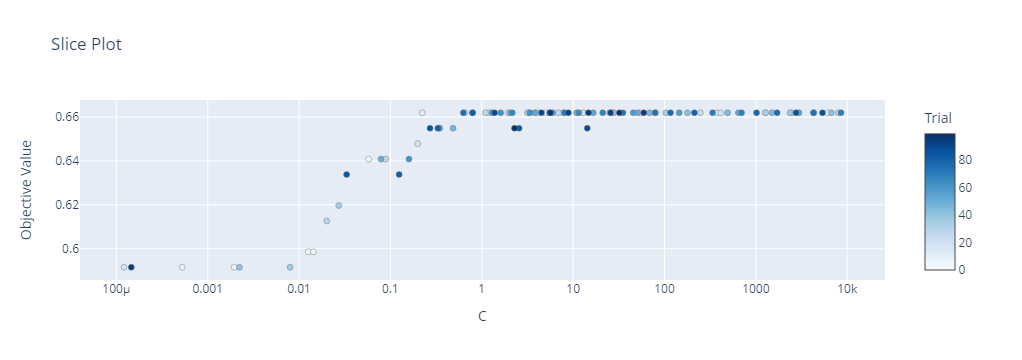

In [161]:
plot_rank(study)

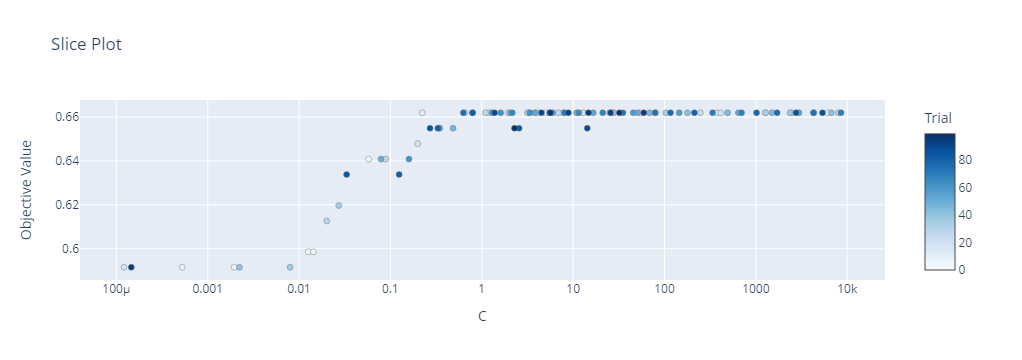

In [162]:
plot_slice(study)

In [163]:
# Retrieve the best hyperparameters
best_params = study.best_params
print('Best parameters:', best_params)

Best parameters: {'C': 3.2793061777127344}


In [164]:
# Create and fit the model
model = LogisticRegression(max_iter=1000, **best_params)
model.fit(X_train, y_train)

LogisticRegression(C=3.2793061777127344, max_iter=1000)

In [165]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52        58
           1       0.68      0.81      0.74        84

    accuracy                           0.66       142
   macro avg       0.65      0.63      0.63       142
weighted avg       0.66      0.66      0.65       142



## Optuna Models

In [17]:
from sklearn.ensemble import RandomForestClassifier
def objective(trial):

    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    if classifier_name == 'SVC':
         svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
         classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    else:
        rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
        
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-12-21 02:37:41,827] A new study created in memory with name: no-name-b51d84c8-85ec-4d3e-86ec-3e698036e3d6
[I 2023-12-21 02:37:41,830] Trial 0 finished with value: 0.6056338028169014 and parameters: {'classifier': 'SVC', 'svc_c': 1.4181639828497497e-08}. Best is trial 0 with value: 0.6056338028169014.
[I 2023-12-21 02:37:41,832] Trial 1 finished with value: 0.6056338028169014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 7}. Best is trial 0 with value: 0.6056338028169014.
[I 2023-12-21 02:37:41,835] Trial 2 finished with value: 0.6056338028169014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 9}. Best is trial 0 with value: 0.6056338028169014.
[I 2023-12-21 02:37:41,838] Trial 3 finished with value: 0.6056338028169014 and parameters: {'classifier': 'SVC', 'svc_c': 72759317.0288819}. Best is trial 0 with value: 0.6056338028169014.
[I 2023-12-21 02:37:41,841] Trial 4 finished with value: 0.6056338028169014 and parameters: {'classifier': 'SVC', 'svc